In [39]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [40]:
df=pd.read_csv('retail_store_inventory.csv',parse_dates=['Date'])

In [41]:
df.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer


<Axes: >

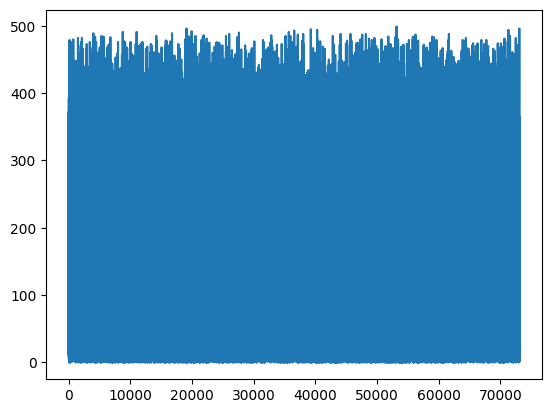

In [42]:
temp=df["Units Sold"]
temp.plot()

C:\Users\umidu\AppData\Local\Temp\ipykernel_26320\2324073611.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts_df['Date'] = pd.to_datetime(ts_df['Date'])


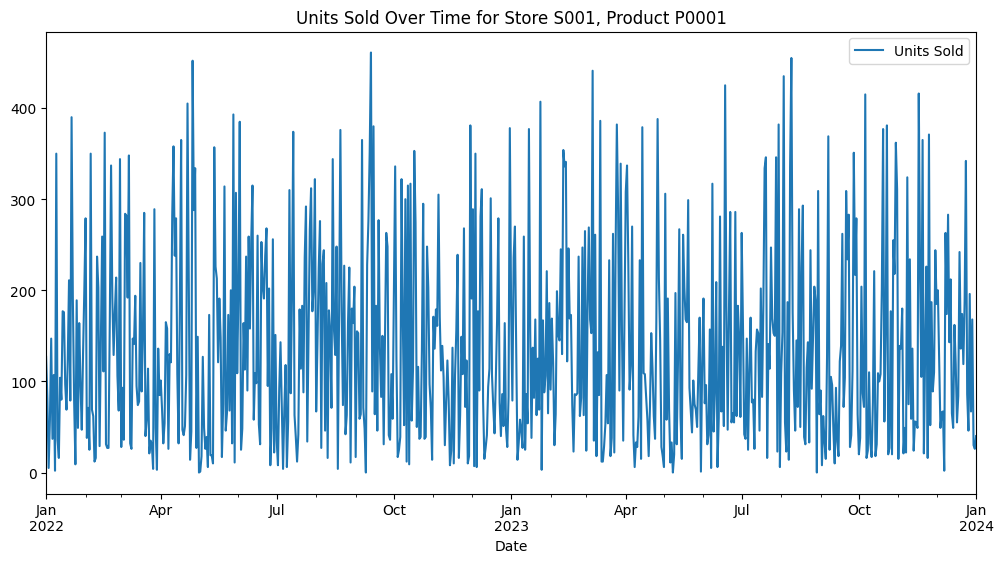

In [43]:
# Filter data for Store S001 and Product P0001
filtered_df = df[(df['Store ID']=='S001') & (df['Product ID']=='P0001')]

# Create new dataframe with just Date and Units Sold
ts_df = filtered_df[['Date', 'Units Sold']]

# Convert Date to datetime
ts_df['Date'] = pd.to_datetime(ts_df['Date'])

# Set Date as index
ts_df.set_index('Date', inplace=True)

# Plot the time series
ts_df.plot(figsize=(12,6))
plt.title('Units Sold Over Time for Store S001, Product P0001')
plt.show()

In [83]:
df2=pd.read_csv('dailysales.csv')

In [84]:
df2.head()

,date,sales
0,01-Jan-18,477.0
1,02-Jan-18,365.0
2,03-Jan-18,442.0
3,04-Jan-18,490.0
4,05-Jan-18,396.0


In [89]:
from statsmodels.tsa.seasonal import seasonal_decompose
df = df.asfreq('D')
result = seasonal_decompose(df2['sales'], model='additive')
result.plot()

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

In [ ]:
cp1 = ModelCheckpoint('model1.h5', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [69]:
df2.set_index('date',inplace=True)

In [44]:
ts_df.head()

,Units Sold
Date,
2022-01-01,127
2022-01-02,81
2022-01-03,5
2022-01-04,58
2022-01-05,147


In [45]:
ts_df

,Units Sold
Date,
2022-01-01,127
2022-01-02,81
2022-01-03,5
2022-01-04,58
2022-01-05,147
...,...
2023-12-28,67
2023-12-29,168
2023-12-30,30


In [70]:
def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [a for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [71]:
window_size = 5
X, y = df_to_X_y(df2, window_size=window_size)

In [72]:
X.shape, y.shape

((699, 5, 1), (699, 1))

In [73]:
X[:5], y[:5]

(array([[[477.],
         [365.],
         [442.],
         [490.],
         [396.]],
 
        [[365.],
         [442.],
         [490.],
         [396.],
         [385.]],
 
        [[442.],
         [490.],
         [396.],
         [385.],
         [492.]],
 
        [[490.],
         [396.],
         [385.],
         [492.],
         [142.]],
 
        [[396.],
         [385.],
         [492.],
         [142.],
         [331.]]]),
 array([[385.],
        [492.],
        [142.],
        [331.],
        [249.]]))

In [74]:
X_train, X_test, X_val = X[:int(0.7*len(X))], X[int(0.7*len(X)):int(0.9*len(X))], X[int(0.9*len(X)):]
y_train, y_test, y_val = y[:int(0.7*len(y))], y[int(0.7*len(y)):int(0.9*len(y))], y[int(0.9*len(y)):]


In [81]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

# Define callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=0.0001
)

checkpoint = ModelCheckpoint(
    'best_model.h5',
    monitor='val_loss',
    save_best_only=True
)

# Modified model architecture
model1 = Sequential([
    # Input layer
    InputLayer((5, 1)),
    
    # First LSTM layer with return sequences
    LSTM(64, return_sequences=True),
    BatchNormalization(),
    Dropout(0.2),
    
    # Second LSTM layer
    LSTM(32),
    BatchNormalization(),
    Dropout(0.2),
    
    # Dense layers with gradual reduction in units
    Dense(16, activation='relu'),
    BatchNormalization(),
    
    Dense(8, activation='relu'),
    BatchNormalization(),
    
    # Output layer
    Dense(1, activation='linear')
])

# Compile with optimized parameters
model1.compile(
    optimizer=Adam(learning_rate=0.001, clipnorm=1.0),
    loss=MeanSquaredError(),
    metrics=[RootMeanSquaredError()]
)

model1.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 5, 64)          │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 5, 64)          │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 8)              │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,465 (119.00 KB)

 Trainable params: 30,225 (118.07 KB)

 Non-trainable params: 240 (960.00 B)

In [78]:
cp1 = ModelCheckpoint('model1.h5', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [82]:
model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, callbacks=[cp1])

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 70ms/step - loss: 123147.5938 - root_mean_squared_error: 347.4167 - val_loss: 43382.9492 - val_root_mean_squared_error: 208.2857
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 151453.4531 - root_mean_squared_error: 387.2389 - val_loss: 43288.3203 - val_root_mean_squared_error: 208.0585
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 150491.7656 - root_mean_squared_error: 385.3543 - val_loss: 43211.3633 - val_root_mean_squared_error: 207.8734
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 186893.7344 - root_mean_squared_error: 429.5039 - val_loss: 43144.5938 - val_root_mean_squared_error: 207.7128
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 157716.6094 - root_mean_squared_error: 392.6479 - val_loss: 43005.2031 - val_root_mean_squared_error: 207.3770
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 261456.1562 - root_mean_squared_error: 492.6583 - val_loss: 42970.1875 - val_root_mean_squ

In [56]:
from tensorflow.keras.models import load_model
model1 = load_model('model1.h5')

In [57]:
train_predictions = model1.predict(X_train).flatten()

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


In [58]:
train_predictions

array([136.08388 , 138.15584 , 134.83559 , 136.3976  , 134.50626 ,
       136.27249 , 139.44124 , 136.9917  , 136.4834  , 135.15741 ,
       133.66225 , 133.62859 , 133.79909 , 133.94168 , 133.79779 ,
       133.8351  , 130.06606 , 132.02405 , 133.3883  , 135.18718 ,
       135.50252 , 136.72523 , 135.92415 , 134.29158 , 135.28593 ,
       134.80798 , 134.66266 , 133.28859 , 133.95958 , 134.87149 ,
       137.0126  , 135.32742 , 135.43315 , 135.64409 , 136.68156 ,
       139.70842 , 137.49527 , 136.22554 , 135.0815  , 134.97948 ,
       134.42467 , 134.86903 , 129.04353 , 134.4061  , 136.11046 ,
       139.2644  , 139.33127 , 134.08652 , 134.01396 , 132.15431 ,
       132.4691  , 132.53668 , 133.05397 , 133.63158 , 131.47865 ,
       135.33449 , 135.38036 , 136.15515 , 135.618   , 133.39272 ,
       133.14845 , 123.410866, 132.53755 , 135.77402 , 136.20012 ,
       136.20747 , 134.58195 , 133.51317 , 133.706   , 133.99849 ,
       133.78108 , 133.83855 , 133.6245  , 132.23991 , 134.857

In [60]:
train_predictions = model1.predict(X_train).flatten()
y_train=y_train.flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train})
train_results

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


,Train Predictions,Actuals
0,136.083878,37
1,138.155838,107
2,134.835587,2
3,136.397598,350
4,134.506256,36
...,...,...
503,135.243454,101
504,135.192245,75
505,135.144226,69
506,134.702454,50


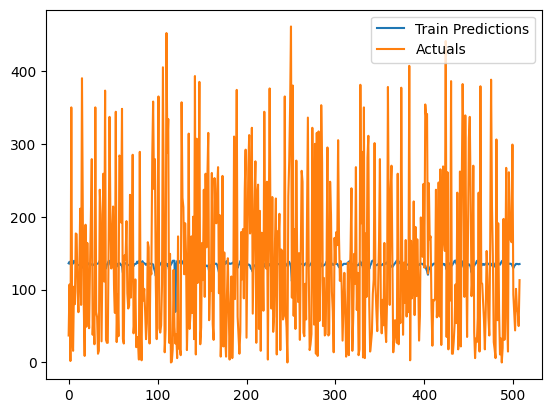

In [62]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'])
plt.plot(train_results['Actuals'])
plt.legend(['Train Predictions', 'Actuals'])